# BUAN 6341 – Applied Machine Learning

                                                               Project work submitted by:
                                                                               - Aniparna Sengupta, axs169330


## [TABLE OF CONTENTS](#Table-of-contents)

1. [INTRODUCTION](#INTRODUCTION)

2. [THE PROBLEM DOMAIN](#THE-PROBLEM-DOMAIN)

3. [DATA DICTIONARY](#DATA-DICTIONARY)

4. [METRIC FOR SUCESS](#METRIC-FOR-SUCESS)

5. [USED LIBRARIES](#USED-LIBRARIES)

6. [EXPLORATION DATA ANALYSIS](#EXPLORATION-DATA-ANALYSIS)

7. [DATA CLEANING](#DATA-CLEANING)

9. [FINE TUNING AND RUNNING VARIOUS MODELS](#FINE-TUNING-ALGORITHM)

11. [CONCLUSION](#CONCLUSION)

12. [EFFORT OF EACH TEAM MEMBER](#EFFORT-OF-EACH-TEAM-MEMBER)

## INTRODUCTION

[[ go back to the top ]](#Table-of-contents)

**Housing Dataset Overview: **

The data given to us:

        fraud detection (fraud_data.csv)

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of al

We used the dataset to build your machine learning models. We tried to reduce the fraud activities using better Recall for transaction. Our model was based on “features” whose names were not given to us. And this scenario is very common in current market where the customer privacy is given huge priority. 

We divided the data into train and test set and afterwards we used the test set to see how well your model performs on unseen data.


## THE PROBLEM DOMAIN

[[ go back to the top ]](#Table-of-contents)
 
The main objective of this project is to increase the Recall and F1 score of the confusion matrix.


### *Fraud Detection*
<img src="https://assets.trabiancdn.com/api/file/gjMYZSauQ96oi5XYCnwN+Card_Fraud.jpg" />


## DATA DICTIONARY

[[ go back to the top ]](#Table-of-contents)

Time

Amount

Class

We don't have our majority of the variables defined due to privacy issue (or PCA)


## METRIC FOR SUCESS 

[[ go back to the top ]](#Table-of-contents)

we can use [Recall or F1_score](https://en.wikipedia.org/wiki/Precision_and_recall) — recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. Based on the quality of data and preliminary baseline models we should try to achieve at least 90% recall.

## USED LIBRARIES

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

**Importing the libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,classification_report
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA as sklearnPCA
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

D:\software\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EXPLORATION DATA ANALYSIS

[[ go back to the top ]](#Table-of-contents)

Let's look at the data we're working with. It's vital that we spot any data errors before investing too much time in our analysis.

We are looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
# Reading our dataset
data = pd.read_csv('fraud_data.csv',header = 0)

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**One of the first things we should look for is missing data.**

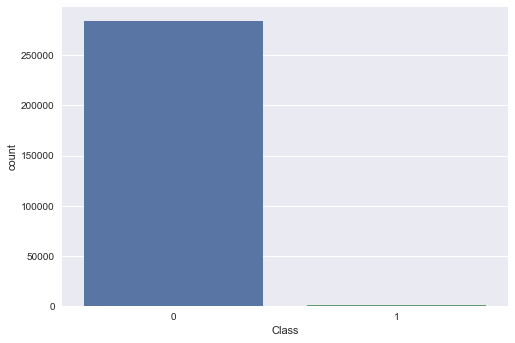

In [5]:
sb.countplot("Class",data=data)
plt.show()

# As we know data is imbalanced and this graph also confirmed it

In [6]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

In [7]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


Hence in data there is only 0.17 % are the fraud transcation while 99.83 are valid transcation
So now we have to do resampling of this data
before doing resampling lets have look at the amount related to valid transcation and fraud transcation

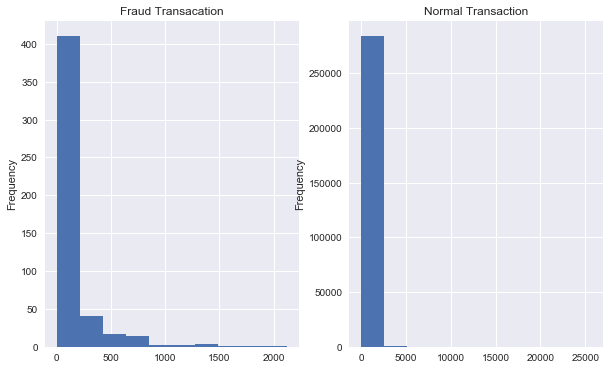

In [8]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")
plt.show()

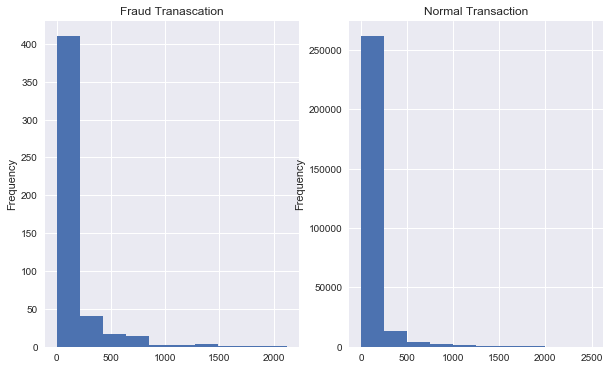

In [9]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")
plt.show()

In [10]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [11]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Normalized Amount'],
      dtype='object')

Here now after exploring data we can say there is no pattern in data. 
Now lets start with resampling of data

ReSampling - Under Sampling

Before re sampling lets have look at the different accuracy matrices

Accuracy = TP+TN/Total

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

TP = True possitive means no of possitve cases which are predicted possitive

TN = True negative means no of negative cases which are predicted negative

FP = False possitve means no of negative cases which are predicted possitive

FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

Resampling

in this we will resample our data with different size

then we will try to use this resampled data to train our model

then we will use this model to predict for our original data

** For evaluation use different evaluation techniques, only considering the accuracy won’t be enough. We should see recall, precision, f1 score along with it to get the overall picture. Based on this dataset I would go with Recall since True positive rate has to be higher to get the most profit and least harm on fradulant transaction. I.e it is better to classify a normal transaction as fraud rather than classifing fraud as normal transaction because the risk is way more. So recall over precision and accuracy. **

In [12]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [13]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [14]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [15]:
def printing_Kfold_scores(x_train_data,y_train_data,choose_model):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]
    k_param_range = [1,2,3,4,5,6,7]
    d_param_range = [1,2,3,4,5,6,7]
    rf_param_range =[1,20,40,80,100,500,1000] 

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
    results_table['parameter'] = c_param_range
    
    if choose_model == 'logistic':
        results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = c_param_range
    elif choose_model == 'svc':
        results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = c_param_range
    elif choose_model == 'svc_kernal':
        results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = c_param_range
    elif choose_model == 'knn':
        results_table = pd.DataFrame(index = range(len(k_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = k_param_range
    elif choose_model == 'dtree':
        results_table = pd.DataFrame(index = range(len(d_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = d_param_range
    elif choose_model == 'rforest':
        results_table = pd.DataFrame(index = range(len(rf_param_range),2), columns = ['parameter','Mean accuracy score','Mean precision score','Mean recall score','Mean f1 score'])
        results_table['parameter'] = rf_param_range
        

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param,k_param,d_param,rf_param in zip(c_param_range,k_param_range,d_param_range,rf_param_range):
        
        if choose_model == 'logistic':
            print('-------------------------------------------')
            print('C parameter: ', c_param)
            print('-------------------------------------------')
            print('')
        elif choose_model == 'svc':
            print('-------------------------------------------')
            print('C parameter: ', c_param)
            print('-------------------------------------------')
            print('')
        elif choose_model == 'svc_kernal':
            print('-------------------------------------------')
            print('C parameter: ', c_param)
            print('-------------------------------------------')
            print('')
        elif choose_model == 'knn':
            print('-------------------------------------------')
            print('Nearest Neighbors parameter: ', k_param)
            print('-------------------------------------------')
            print('')
        elif choose_model == 'dtree':
            print('-------------------------------------------')
            print('Max Features parameter: ', d_param)
            print('-------------------------------------------')
            print('')
        elif choose_model == 'rforest':
            print('-------------------------------------------')
            print('No of Trees parameter: ', rf_param)
            print('-------------------------------------------')
            print('')
        
        recall_accs = []
        precision_accs = []
        accuracy_accs = []
        f1_accs = []
        
        for iteration, indices in enumerate(fold,start=1):
            
            if choose_model == 'logistic':
                # Call the logistic regression model with a certain C parameter
                clf = LogisticRegression(C = c_param, penalty = 'l1')
            elif choose_model == 'svc':
                # Call the svc regression model with a certain C parameter
                clf = SVC(C = c_param)
            elif choose_model == 'svc_kernal':
                # Call the svc kernel regression model with a certain C parameter
                clf = SVC(C = c_param, kernel='rbf')
            elif choose_model == 'knn':
                # Call the knn regression model with a certain C parameter
                clf = KNeighborsClassifier(n_neighbors = k_param)
            elif choose_model == 'dtree':
                # Call the dtree regression model with a certain C parameter
                clf = clf = DecisionTreeClassifier(max_depth = d_param)
            elif choose_model == 'rforest':
                # Call the random forest regression model with a certain C parameter
                clf = RandomForestClassifier(n_estimators = rf_param)
            
            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            clf.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = clf.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            
            precision_acc = precision_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            precision_accs.append(precision_acc)
            
            accuracy_acc = accuracy_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            accuracy_accs.append(accuracy_acc)
            
            f1_acc = f1_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            f1_accs.append(f1_acc)
            
            print('Iteration ', iteration,': recall = ', recall_acc,'precision:',precision_acc,'accuracy:',accuracy_acc,'f1:',f1_acc)
                    
            
            
        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean accuracy score'] = np.mean(accuracy_accs)
        results_table.ix[j,'Mean precision score'] = np.mean(precision_accs)
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        results_table.ix[j,'Mean f1 score'] = np.mean(f1_accs)
        j += 1
        print('')
        print('Mean accuracy score ', np.mean(accuracy_accs))
        print('Mean precision score ', np.mean(precision_accs))
        print('Mean recall score ', np.mean(recall_accs))
        print('Mean f1 score ', np.mean(f1_accs))
        print('')

    best_param = results_table.loc[results_table['Mean recall score'].idxmax()]['parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation = ', best_param)
    print('*********************************************************************************')
    
    return best_param

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset

def graphing_best_param(best_param,choose_model):
    if choose_model == 'logistic':
        # Call the logistic regression model with a certain C parameter
        clf = LogisticRegression(C = best_param, penalty = 'l1')
    elif choose_model == 'svc':
        # Call the svc regression model with a certain C parameter
        clf = SVC(C = best_param)
    elif choose_model == 'svc_kernal':
        # Call the svc kernel regression model with a certain C parameter
        clf = SVC(C = best_param, kernel='rbf')
    elif choose_model == 'knn':
        # Call the knn regression model with a certain C parameter
        clf = KNeighborsClassifier(n_neighbors = best_param)
    elif choose_model == 'rforest':
        # Call the random forest regression model with a certain C parameter
        clf = RandomForestClassifier(n_estimators = best_param)
    elif choose_model == 'dtree':
        # Call the svc kernel regression model with a certain C parameter
        clf = clf = DecisionTreeClassifier(max_depth = best_param)
    

    clf_fit = clf.fit(X_train_undersample,y_train_undersample.values.ravel())
    y_pred_undersample = clf_fit.predict(X_test_undersample.values)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
    np.set_printoptions(precision=2)
    
    accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
    precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

    print("Using Best C value on the undersampled dataset")
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Confusion matrix')
    plt.show()

    #whole dataset
    y_pred = clf_fit.predict(X_test.values)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)

    accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
    precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

    print("Using Best C value on the Whole dataset")
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Confusion matrix')
    plt.show()

    #ROC curve

    if choose_model in ['logistic','svc','svc_kernal']:
        y_pred_undersample_score = clf_fit.decision_function(X_test_undersample.values)
    else:
        y_pred_undersample_score = clf_fit.predict(X_test_undersample.values)
        
    fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    print("ROC Curve")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

** Next create a generic bagging function for the various model to avoid repetition of codes.**

In [18]:
def bagging_model(best_param,choose_model):
    if choose_model == 'logistic':
        # Call the logistic regression model with a certain C parameter
        clf = LogisticRegression(C = best_param, penalty = 'l1')
        print("Logistic Regression")
    elif choose_model == 'svc':
        # Call the svc regression model with a certain C parameter
        clf = SVC(C = best_param)
        print("SVC")
    elif choose_model == 'svc_kernal':
        # Call the svc kernel regression model with a certain C parameter
        clf = SVC(C = best_param, kernel='rbf')
        print("Kernel SVC")
    elif choose_model == 'knn':
        # Call the knn regression model with a certain C parameter
        clf = KNeighborsClassifier(n_neighbors = best_param)
        print('KNN')
    elif choose_model == 'rforest':
        # Call the random forest regression model with a certain C parameter
        clf = RandomForestClassifier(n_estimators = best_param)
        print("Random Forest")
    elif choose_model == 'dtree':
        # Call the svc kernel regression model with a certain C parameter
        clf = clf = DecisionTreeClassifier(max_depth = best_param)
        print("Decision Tree")
    
    #Bagging 
    lr_bag_clf = BaggingClassifier(clf , n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1)
    lr_bag_clf.fit(X_train_undersample, y_train_undersample)
    y_pred = lr_bag_clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)

    print("For Whole dataset")
    accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
    precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
    plt.show()
    plt.close()
    
    # Plot ROC
    print("ROC Curve")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.close()

** Next create a generic bagging function for the various model to avoid repetition of codes.**

In [19]:
def pasting_model(best_param,choose_model):
    if choose_model == 'logistic':
        # Call the logistic regression model with a certain C parameter
        clf = LogisticRegression(C = best_param, penalty = 'l1')
        print("Logistic Regression")
    elif choose_model == 'svc':
        # Call the svc regression model with a certain C parameter
        clf = SVC(C = best_param)
        print("SVC")
    elif choose_model == 'svc_kernal':
        # Call the svc kernel regression model with a certain C parameter
        clf = SVC(C = best_param, kernel='rbf')
        print("Kernel SVC")
    elif choose_model == 'knn':
        # Call the knn regression model with a certain C parameter
        clf = KNeighborsClassifier(n_neighbors = best_param)
        print('KNN')
    elif choose_model == 'rforest':
        # Call the random forest regression model with a certain C parameter
        clf = RandomForestClassifier(n_estimators = best_param)
        print("Random Forest")
    elif choose_model == 'dtree':
        # Call the svc kernel regression model with a certain C parameter
        clf = clf = DecisionTreeClassifier(max_depth = best_param)
        print("Decision Tree")
    
    #pasting
    lr_bag_clf = BaggingClassifier(clf , n_estimators=1000, max_samples=100, bootstrap=False, n_jobs=-1)
    lr_bag_clf.fit(X_train_undersample, y_train_undersample)
    y_pred = lr_bag_clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)
    
    accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
    precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

    print("For Whole dataset")
    
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
    plt.show()
    plt.close()
    
    # Plot ROC
    print("ROC Curve")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.close()

** Next create a generic adaboost function for the various model to avoid repetition of codes.**

In [20]:
def adaboost_model(best_param,choose_model):
    if choose_model == 'logistic':
        # Call the logistic regression model with a certain C parameter
        clf = LogisticRegression(C = best_param, penalty = 'l1')
        print("Logistic Regression")
    elif choose_model == 'svc':
        # Call the svc regression model with a certain C parameter
        clf = SVC(C = best_param)
        print("SVC")
    elif choose_model == 'svc_kernal':
        # Call the svc kernel regression model with a certain C parameter
        clf = SVC(C = best_param, kernel='rbf')
        print("Kernel SVC")
    elif choose_model == 'knn':
        # Call the knn regression model with a certain C parameter
        clf = KNeighborsClassifier(n_neighbors = best_param)
        print('KNN')
    elif choose_model == 'rforest':
        # Call the random forest regression model with a certain C parameter
        clf = RandomForestClassifier(n_estimators = best_param)
        print("Random Forest")
    elif choose_model == 'dtree':
        # Call the svc kernel regression model with a certain C parameter
        clf = clf = DecisionTreeClassifier(max_depth = best_param)
        print("Decision Tree")
    
    #adaboost
    if choose_model == 'logistic':
        ada_clf = AdaBoostClassifier(clf, n_estimators=100,algorithm="SAMME.R", learning_rate=0.5)
    else:
        ada_clf = AdaBoostClassifier(clf, n_estimators=100,algorithm="SAMME", learning_rate=0.5)
    
    
    ada_clf.fit(X_train_undersample, y_train_undersample)
    y_pred = ada_clf.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_pred)
    np.set_printoptions(precision=2)
    
    accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
    precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
    recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
    f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

    print("For Whole dataset")
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
    plt.show()
    plt.close()
    
    # Plot ROC
    print("ROC Curve")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.close()

# Logistic Regression

In [21]:
logistic_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'logistic')

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall =  0.931506849315 precision: 0.708333333333 accuracy: 0.760869565217 f1: 0.804733727811
Iteration  2 : recall =  0.917808219178 precision: 0.761363636364 accuracy: 0.804347826087 f1: 0.832298136646
Iteration  3 : recall =  1.0 precision: 0.614583333333 accuracy: 0.731884057971 f1: 0.761290322581
Iteration  4 : recall =  0.959459459459 precision: 0.739583333333 accuracy: 0.795620437956 f1: 0.835294117647
Iteration  5 : recall =  0.954545454545 precision: 0.677419354839 accuracy: 0.759124087591 f1: 0.792452830189

Mean accuracy score  0.770369194965
Mean precision score  0.70025659824
Mean recall score  0.9526639965
Mean f1 score  0.805213826975

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall =  0.835616438356 precision: 1.0 accuracy: 0.913043478261 f1: 0.910447761194
Iteration  

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  1 : recall =  0.876712328767 precision: 0.969696969697 accuracy: 0.920289855072 f1: 0.920863309353
Iteration  2 : recall =  0.876712328767 precision: 0.984615384615 accuracy: 0.927536231884 f1: 0.927536231884
Iteration  3 : recall =  0.966101694915 precision: 0.95 accuracy: 0.963768115942 f1: 0.957983193277
Iteration  4 : recall =  0.945945945946 precision: 0.945945945946 accuracy: 0.941605839416 f1: 0.945945945946
Iteration  5 : recall =  0.909090909091 precision: 0.952380952381 accuracy: 0.934306569343 f1: 0.93023255814

Mean accuracy score  0.937501322332
Mean precision score  0.960527850528
Mean recall score  0.914912641497
Mean f1 score  0.93651224772

-------------------------------------------
C parameter:  100
-------------------------------------------

Iteration  1 : recall =  0.876712328767 precision: 0.955223880597 accuracy: 0.913043478261 f1: 0.914285714286
Iteration  2 : recall =  0.876712328767 precision: 0.984615384615 accuracy: 0.927536231884 f1: 0.927536231

Using Best C value on the undersampled dataset
accuracy:  0.922297297297
precision:  0.907894736842
recall:  0.938775510204
f1:  0.923076923077


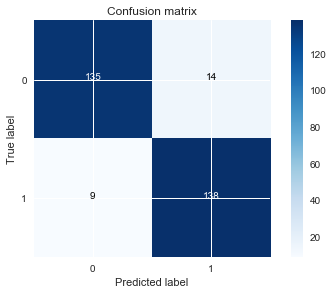

Using Best C value on the Whole dataset
accuracy:  0.884683356156
precision:  0.0135324779471
recall:  0.918367346939
f1:  0.0266719351971


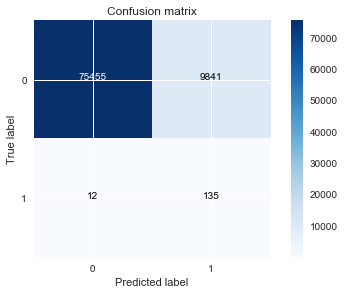

ROC Curve


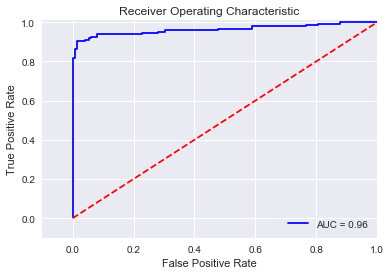

In [22]:
graphing_best_param(logistic_param,'logistic')

**Now let's run all the models one by one. And we can see the various parameters below.**

Logistic Regression


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.554439801973
precision:  0.00363864820293
recall:  0.945578231293
f1:  0.00724940022948


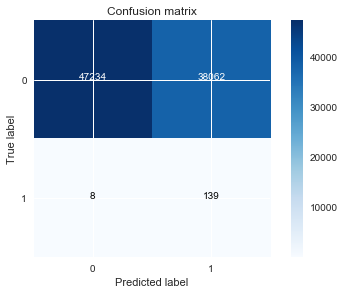

ROC Curve


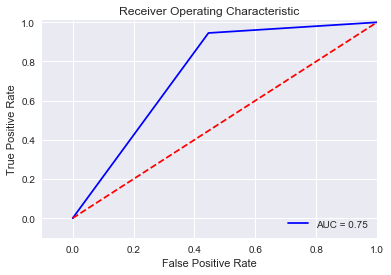

In [23]:
bagging_model(logistic_param,'logistic')

Logistic Regression


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.554802616949
precision:  0.00364160335342
recall:  0.945578231293
f1:  0.00725526528695


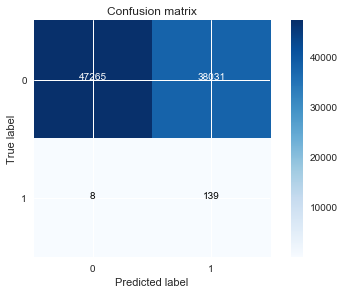

ROC Curve


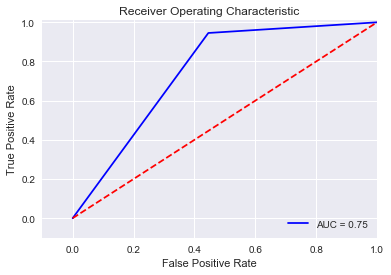

In [24]:
pasting_model(logistic_param,'logistic')

For Logistic, Adaboost gives an output which doesnot satisfies the criteria. So we should not be using this model for our classification. 

Logistic Regression


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.998279554791
precision:  nan
recall:  0.0
f1:  0.0


D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in long_scalars


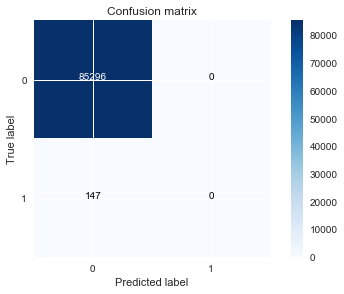

ROC Curve


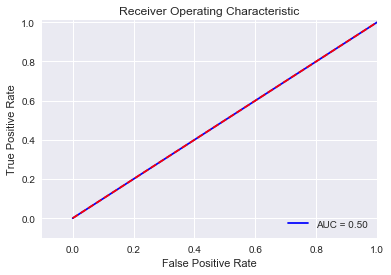

In [25]:
adaboost_model(logistic_param,'logistic')

# Support vector machines

In [26]:
svc_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'svc')

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall =  0.835616438356 precision: 0.983870967742 accuracy: 0.905797101449 f1: 0.903703703704
Iteration  2 : recall =  0.821917808219 precision: 0.967741935484 accuracy: 0.891304347826 f1: 0.888888888889
Iteration  3 : recall =  1.0 precision: 0.468253968254 accuracy: 0.514492753623 f1: 0.637837837838
Iteration  4 : recall =  0.702702702703 precision: 1.0 accuracy: 0.839416058394 f1: 0.825396825397
Iteration  5 : recall =  0.984848484848 precision: 0.541666666667 accuracy: 0.591240875912 f1: 0.698924731183

Mean accuracy score  0.748450227441
Mean precision score  0.792306707629
Mean recall score  0.869017086825
Mean f1 score  0.790950397402

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall =  0.86301369863 precision: 0.940298507463 accuracy: 0.898550724638 f1: 0.9
Iteration  2 : recal

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  5 : recall =  0.909090909091 precision: 0.952380952381 accuracy: 0.934306569343 f1: 0.93023255814

Mean accuracy score  0.934613350259
Mean precision score  0.954006768015
Mean recall score  0.914912641497
Mean f1 score  0.933297777911

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall =  0.931506849315 precision: 0.971428571429 accuracy: 0.949275362319 f1: 0.951048951049
Iteration  2 : recall =  0.917808219178 precision: 0.930555555556 accuracy: 0.920289855072 f1: 0.924137931034
Iteration  3 : recall =  0.966101694915 precision: 0.890625 accuracy: 0.934782608696 f1: 0.926829268293
Iteration  4 : recall =  0.959459459459 precision: 0.946666666667 accuracy: 0.948905109489 f1: 0.953020134228
Iteration  5 : recall =  0.954545454545 precision: 0.913043478261 accuracy: 0.934306569343 f1: 0.933333333333

Mean accuracy score  0.937511900984
Mean precision score  0.930463854382
Mean recall score  0.9458843

# Evaluation: Recall is the best measure

Using Best C value on the undersampled dataset
accuracy:  0.929054054054
precision:  0.92
recall:  0.938775510204
f1:  0.929292929293


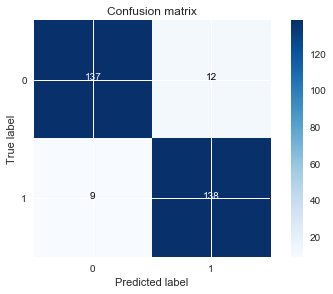

Using Best C value on the Whole dataset
accuracy:  0.912151960956
precision:  0.018830914084
recall:  0.979591836735
f1:  0.0369515011547


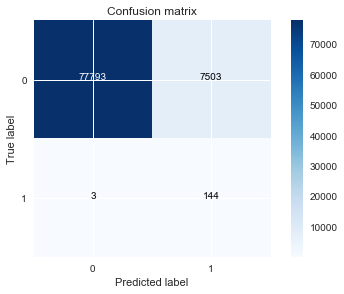

ROC Curve


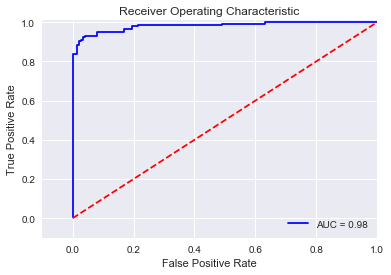

In [27]:
graphing_best_param(svc_param,'svc')

SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.915826925553
precision:  0.0187184041536
recall:  0.931972789116
f1:  0.0366997053308


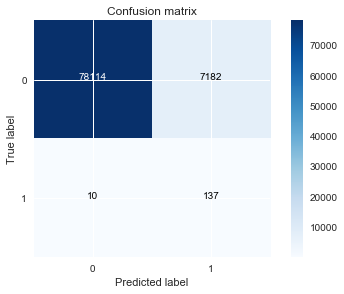

ROC Curve


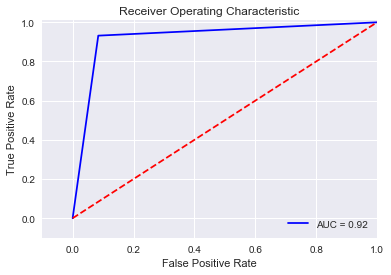

In [72]:
bagging_model(svc_param,'svc')

SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.915112999309
precision:  0.0185636856369
recall:  0.931972789116
f1:  0.0364022851069


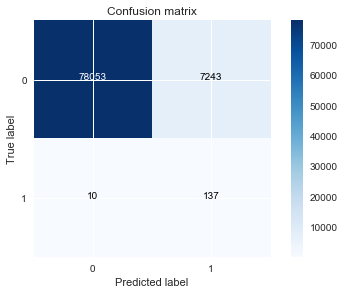

ROC Curve


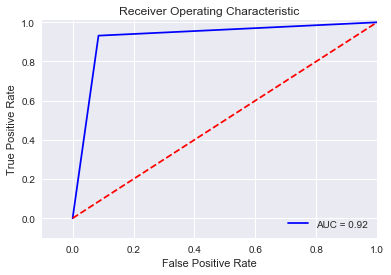

In [61]:
pasting_model(svc_param,'svc')

SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.81172243484
precision:  0.00851011346818
recall:  0.938775510204
f1:  0.0168673226181


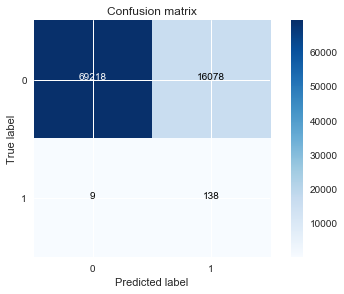

ROC Curve


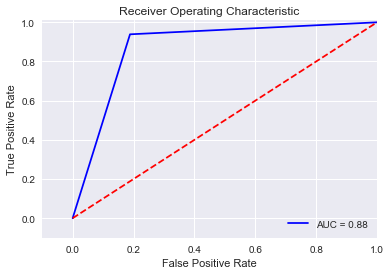

In [62]:
adaboost_model(svc_param,'svc')

# Kernel Support vector machines

In [31]:
k_svc_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'svc_kernal')

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall =  0.835616438356 precision: 0.983870967742 accuracy: 0.905797101449 f1: 0.903703703704
Iteration  2 : recall =  0.821917808219 precision: 0.967741935484 accuracy: 0.891304347826 f1: 0.888888888889
Iteration  3 : recall =  1.0 precision: 0.468253968254 accuracy: 0.514492753623 f1: 0.637837837838
Iteration  4 : recall =  0.702702702703 precision: 1.0 accuracy: 0.839416058394 f1: 0.825396825397
Iteration  5 : recall =  0.984848484848 precision: 0.541666666667 accuracy: 0.591240875912 f1: 0.698924731183

Mean accuracy score  0.748450227441
Mean precision score  0.792306707629
Mean recall score  0.869017086825
Mean f1 score  0.790950397402

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall =  0.86301369863 precision: 0.940298507463 accuracy: 0.898550724638 f1: 0.9
Iteration  2 : recal

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


 5 : recall =  0.909090909091 precision: 0.952380952381 accuracy: 0.934306569343 f1: 0.93023255814

Mean accuracy score  0.934613350259
Mean precision score  0.954006768015
Mean recall score  0.914912641497
Mean f1 score  0.933297777911

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall =  0.931506849315 precision: 0.971428571429 accuracy: 0.949275362319 f1: 0.951048951049
Iteration  2 : recall =  0.917808219178 precision: 0.930555555556 accuracy: 0.920289855072 f1: 0.924137931034
Iteration  3 : recall =  0.966101694915 precision: 0.890625 accuracy: 0.934782608696 f1: 0.926829268293
Iteration  4 : recall =  0.959459459459 precision: 0.946666666667 accuracy: 0.948905109489 f1: 0.953020134228
Iteration  5 : recall =  0.954545454545 precision: 0.913043478261 accuracy: 0.934306569343 f1: 0.933333333333

Mean accuracy score  0.937511900984
Mean precision score  0.930463854382
Mean recall score  0.945884335483
Mean

Using Best C value on the undersampled dataset
accuracy:  0.929054054054
precision:  0.92
recall:  0.938775510204
f1:  0.929292929293


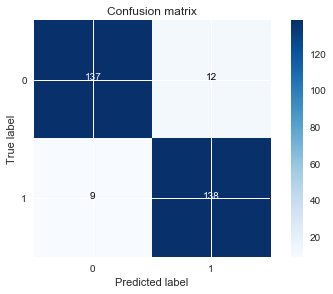

Using Best C value on the Whole dataset
accuracy:  0.912151960956
precision:  0.018830914084
recall:  0.979591836735
f1:  0.0369515011547


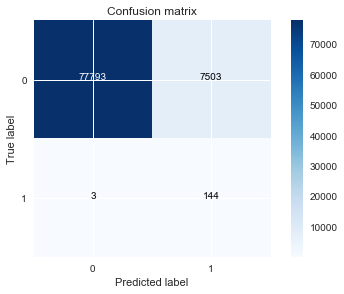

ROC Curve


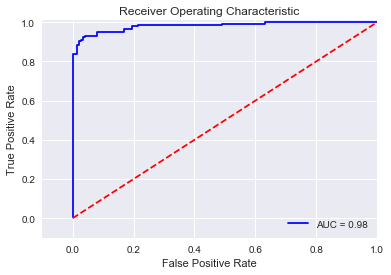

In [63]:
graphing_best_param(k_svc_param,'svc_kernal')

Kernel SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.915206628981
precision:  0.0184531886024
recall:  0.925170068027
f1:  0.0361846481309


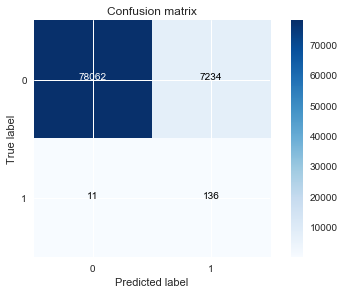

ROC Curve


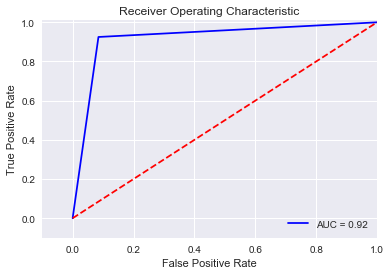

In [64]:
bagging_model(k_svc_param,'svc_kernal')

Kernel SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.916728111138
precision:  0.0189174261254
recall:  0.931972789116
f1:  0.0370821491406


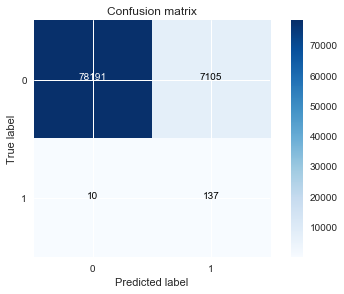

ROC Curve


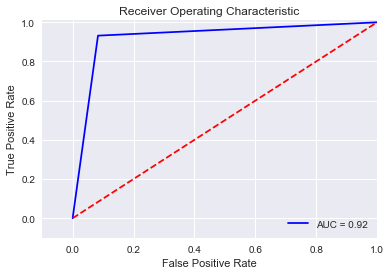

In [67]:
pasting_model(k_svc_param,'svc_kernal')

Kernel SVC


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.81172243484
precision:  0.00851011346818
recall:  0.938775510204
f1:  0.0168673226181


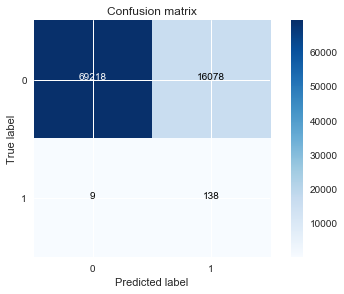

ROC Curve


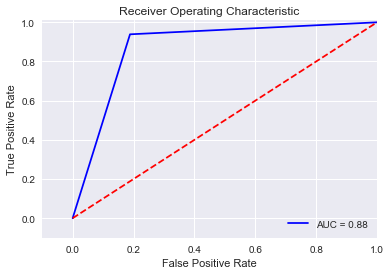

In [66]:
adaboost_model(k_svc_param,'svc_kernal')

# K-Nearest Neighbors Classification

In [36]:
knn_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'knn')

-------------------------------------------
Nearest Neighbors parameter:  1
-------------------------------------------

Iteration  1 : recall =  0.890410958904 precision: 0.955882352941 accuracy: 0.920289855072 f1: 0.921985815603
Iteration  2 : recall =  0.86301369863 precision: 0.940298507463 accuracy: 0.898550724638 f1: 0.9
Iteration  3 : recall =  0.966101694915 precision: 0.934426229508 accuracy: 0.95652173913 f1: 0.95
Iteration  4 : recall =  0.932432432432 precision: 0.958333333333 accuracy: 0.941605839416 f1: 0.945205479452
Iteration  5 : recall =  0.939393939394 precision: 0.911764705882 accuracy: 0.92700729927 f1: 0.925373134328

Mean accuracy score  0.928795091505
Mean precision score  0.940141025826
Mean recall score  0.918270544855
Mean f1 score  0.928512885877

-------------------------------------------
Nearest Neighbors parameter:  2
-------------------------------------------

Iteration  1 : recall =  0.835616438356 precision: 0.983870967742 accuracy: 0.905797101449 f1

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Using Best C value on the undersampled dataset
accuracy:  0.932432432432
precision:  0.956834532374
recall:  0.904761904762
f1:  0.93006993007


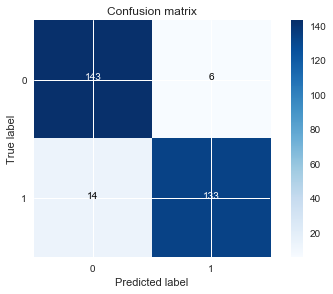

Using Best C value on the Whole dataset
accuracy:  0.939901454771
precision:  0.0265755504935
recall:  0.952380952381
f1:  0.0517082179132


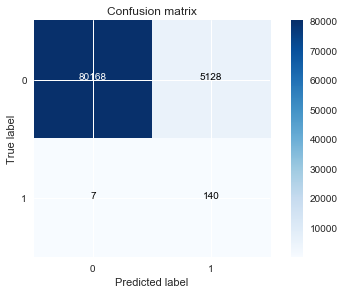

ROC Curve


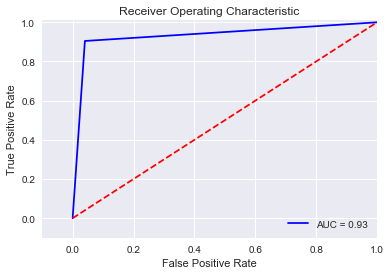

In [68]:
graphing_best_param(knn_param,'knn')

KNN


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.987664290814
precision:  0.110729613734
recall:  0.877551020408
f1:  0.196646341463


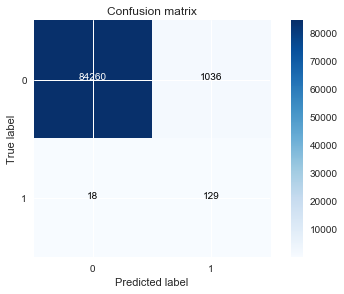

ROC Curve


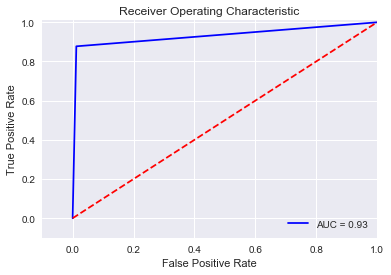

In [69]:
bagging_model(knn_param,'knn')

KNN


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.98717273504
precision:  0.106876553438
recall:  0.877551020408
f1:  0.190546528804


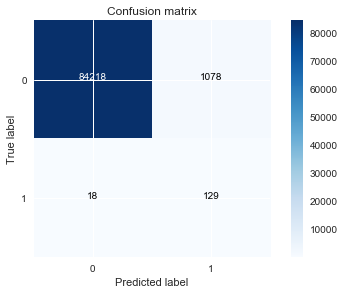

ROC Curve


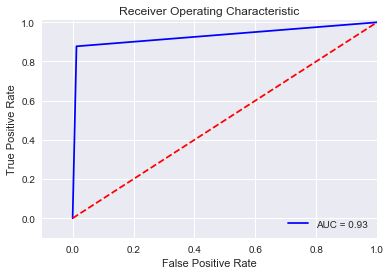

In [70]:
pasting_model(knn_param,'knn')

# Decision Tree Classification

In [40]:
dtree_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'dtree')

-------------------------------------------
Max Features parameter:  1
-------------------------------------------

Iteration  1 : recall =  0.808219178082 precision: 1.0 accuracy: 0.898550724638 f1: 0.893939393939
Iteration  2 : recall =  0.835616438356 precision: 1.0 accuracy: 0.913043478261 f1: 0.910447761194
Iteration  3 : recall =  0.864406779661 precision: 0.910714285714 accuracy: 0.905797101449 f1: 0.886956521739
Iteration  4 : recall =  0.918918918919 precision: 0.971428571429 accuracy: 0.941605839416 f1: 0.944444444444
Iteration  5 : recall =  0.893939393939 precision: 1.0 accuracy: 0.948905109489 f1: 0.944

Mean accuracy score  0.921580450651
Mean precision score  0.976428571429
Mean recall score  0.864220141792
Mean f1 score  0.915957624263

-------------------------------------------
Max Features parameter:  2
-------------------------------------------

Iteration  1 : recall =  0.808219178082 precision: 1.0 accuracy: 0.898550724638 f1: 0.893939393939
Iteration  2 : recall 

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Using Best C value on the undersampled dataset
accuracy:  0.898648648649
precision:  0.920863309353
recall:  0.87074829932
f1:  0.895104895105


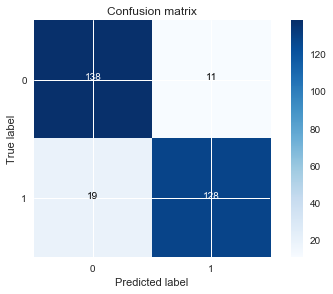

Using Best C value on the Whole dataset
accuracy:  0.907610921901
precision:  0.0172005484233
recall:  0.938775510204
f1:  0.033782129743


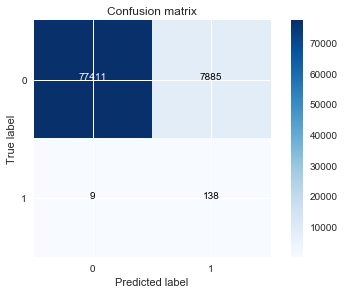

ROC Curve


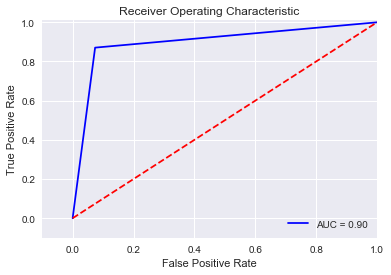

In [75]:
graphing_best_param(dtree_param,'dtree')

Decision Tree


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.974965766651
precision:  0.0573333333333
recall:  0.877551020408
f1:  0.107634543179


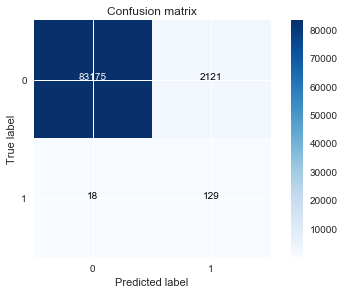

ROC Curve


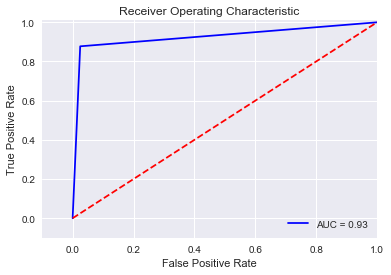

In [76]:
bagging_model(dtree_param,'dtree')

Decision Tree


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.973327247405
precision:  0.0539748953975
recall:  0.877551020408
f1:  0.101694915254


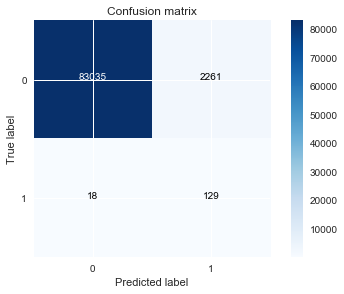

ROC Curve


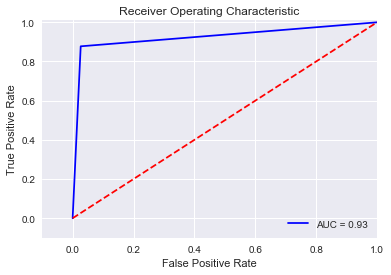

In [77]:
pasting_model(dtree_param,'dtree')

Decision Tree


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.969371393795
precision:  0.0515613652869
recall:  0.965986394558
f1:  0.0978972768011


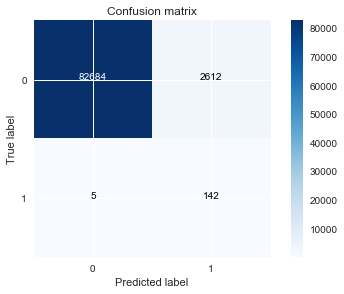

ROC Curve


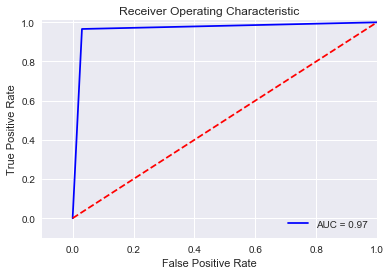

In [78]:
adaboost_model(dtree_param,'dtree')

# Random Forest Classification

In [45]:
rforest_param = printing_Kfold_scores(X_train_undersample,y_train_undersample,'rforest')

-------------------------------------------
No of Trees parameter:  1
-------------------------------------------

Iteration  1 : recall =  0.904109589041 precision: 0.942857142857 accuracy: 0.920289855072 f1: 0.923076923077
Iteration  2 : recall =  0.849315068493 precision: 0.861111111111 accuracy: 0.847826086957 f1: 0.855172413793
Iteration  3 : recall =  0.932203389831 precision: 0.901639344262 accuracy: 0.927536231884 f1: 0.916666666667
Iteration  4 : recall =  0.932432432432 precision: 0.932432432432 accuracy: 0.92700729927 f1: 0.932432432432
Iteration  5 : recall =  0.909090909091 precision: 0.833333333333 accuracy: 0.868613138686 f1: 0.869565217391

Mean accuracy score  0.898254522374
Mean precision score  0.894274672799
Mean recall score  0.905430277778
Mean f1 score  0.899382730672

-------------------------------------------
No of Trees parameter:  20
-------------------------------------------

Iteration  1 : recall =  0.849315068493 precision: 1.0 accuracy: 0.920289855072 f

D:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


0.905405405405 precision: 0.957142857143 accuracy: 0.92700729927 f1: 0.930555555556
Iteration  5 : recall =  0.893939393939 precision: 0.983333333333 accuracy: 0.941605839416 f1: 0.936507936508

Mean accuracy score  0.925896540781
Mean precision score  0.962698412698
Mean recall score  0.889425495741
Mean f1 score  0.92307590067

-------------------------------------------
No of Trees parameter:  40
-------------------------------------------

Iteration  1 : recall =  0.876712328767 precision: 1.0 accuracy: 0.934782608696 f1: 0.934306569343
Iteration  2 : recall =  0.86301369863 precision: 1.0 accuracy: 0.927536231884 f1: 0.926470588235
Iteration  3 : recall =  0.966101694915 precision: 0.904761904762 accuracy: 0.942028985507 f1: 0.934426229508
Iteration  4 : recall =  0.918918918919 precision: 0.957746478873 accuracy: 0.934306569343 f1: 0.937931034483
Iteration  5 : recall =  0.909090909091 precision: 0.967741935484 accuracy: 0.941605839416 f1: 0.9375

Mean accuracy score  0.936052046

Using Best C value on the undersampled dataset
accuracy:  0.942567567568
precision:  0.957746478873
recall:  0.925170068027
f1:  0.941176470588


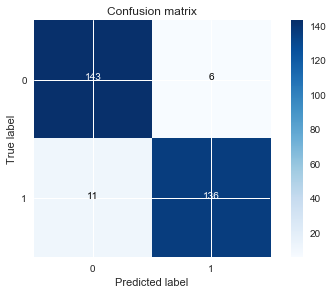

Using Best C value on the Whole dataset
accuracy:  0.969230949288
precision:  0.0513376717281
recall:  0.965986394558
f1:  0.0974939924476


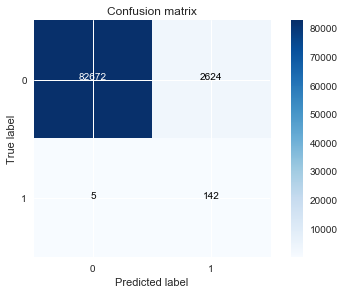

ROC Curve


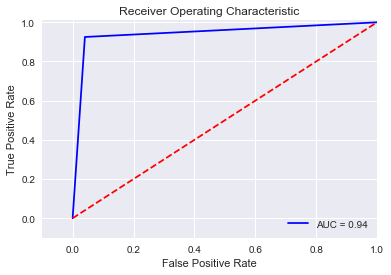

In [46]:
graphing_best_param(rforest_param,'rforest')

Random Forest


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.984995845183
precision:  0.0926058865757
recall:  0.877551020408
f1:  0.167532467532


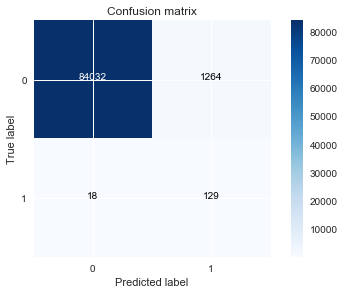

ROC Curve


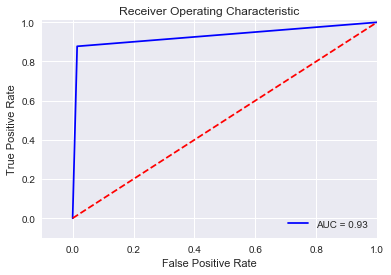

In [79]:
bagging_model(rforest_param,'rforest')

Random Forest


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.985089474855
precision:  0.0931407942238
recall:  0.877551020408
f1:  0.168407310705


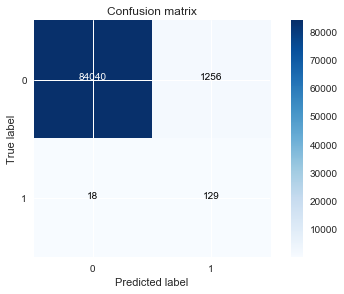

ROC Curve


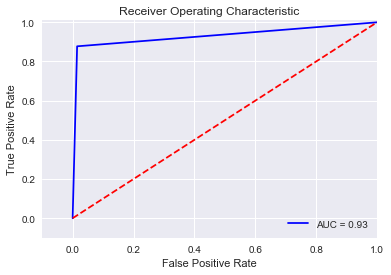

In [80]:
pasting_model(rforest_param,'rforest')

Random Forest


D:\software\Anaconda\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For Whole dataset
accuracy:  0.970424727596
precision:  0.0529676934636
recall:  0.959183673469
f1:  0.100391598434


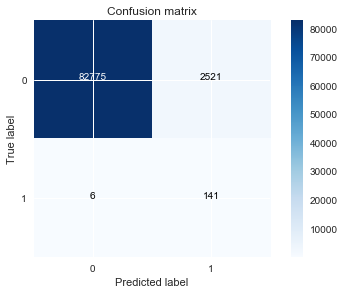

ROC Curve


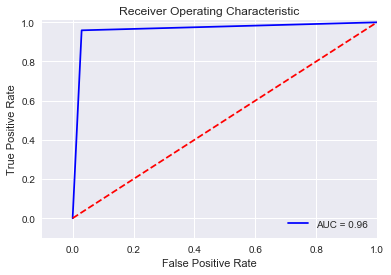

In [81]:
adaboost_model(rforest_param,'rforest')

# Naive Bayes classifiers

In [48]:
#undersample data

nbclf = GaussianNB()
nbclf_fit = nbclf.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = nbclf_fit.predict(X_test_undersample.values)

For undersampled dataset
accuracy:  0.915540540541
precision:  0.9765625
recall:  0.850340136054
f1:  0.909090909091


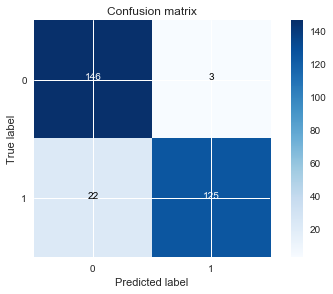

In [49]:
# Compute undersample data confusion matrix for Naive Bayes 
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("For undersampled dataset")
accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

For Whole dataset
accuracy:  0.974755099891
precision:  0.0560954063604
recall:  0.863945578231
f1:  0.105350476981


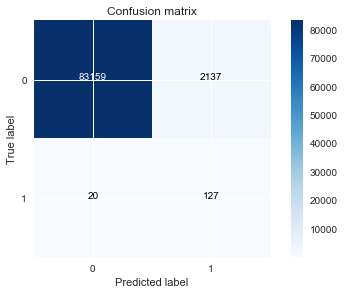

In [50]:
# Compute whole data confusion matrix for Naive Bayes 
y_pred = nbclf_fit.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("For Whole dataset")
accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

ROC Curve


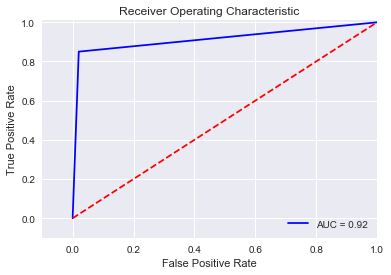

In [51]:
y_pred_undersample_score = nbclf_fit.predict(X_test_undersample.values)
    
fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
print("ROC Curve")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ensemble Vote Classifier

In [52]:
KNN_clf = KNeighborsClassifier(n_neighbors = knn_param)
log_clf = LogisticRegression(C = logistic_param, penalty = 'l1')
svm_clf = SVC(C = svc_param)
svcrbf_clf = SVC(C = k_svc_param, kernel='rbf')
dtree_clf = DecisionTreeClassifier(max_features = dtree_param)
naive_clf = GaussianNB()
rforest_clf = RandomForestClassifier(n_estimators = rforest_param)

In [53]:
voting_clf = VotingClassifier(estimators=
[('knn', KNN_clf), ('svcrbf', svcrbf_clf), ('lr', log_clf),('svm', svm_clf),('dt', dtree_clf), ('naive', naive_clf), ('rf', rforest_clf)], voting='hard')
voting_clf.fit(X_train_undersample, y_train_undersample)

D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')), ('svcrbf', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gam...mators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

For Whole dataset
accuracy:  0.949498496073
precision:  0.0321059721599
recall:  0.972789115646
f1:  0.0621603999131


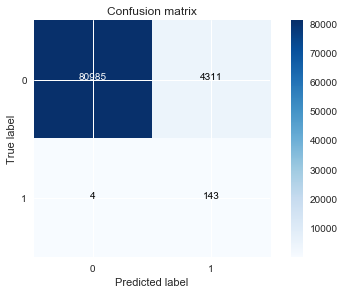

ROC Curve


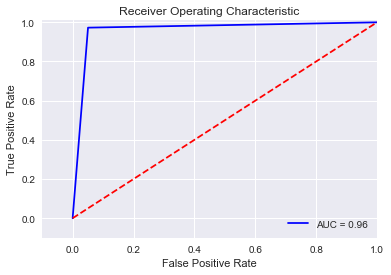

In [54]:
y_pred = voting_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred)
roc_auc = auc(fpr,tpr)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("For Whole dataset")
accuracy = (cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,0]+cnf_matrix[1,0]+cnf_matrix[0,1])
precision = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1])
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
f1 = (2*cnf_matrix[1,1])/(2*cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1])

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()
plt.close()

# Plot ROC
print("ROC Curve")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

# XGBOOST

In [55]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_undersample, y_train_undersample)
# make predictions for test data
y_xgbpred = model.predict(X_test)
y_pred = [round(value) for value in y_xgbpred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.962232131362


** Amazing!! we got an accuracy of 96% using XGBoost. Next let's try to build the confusion matrix and plot it.**

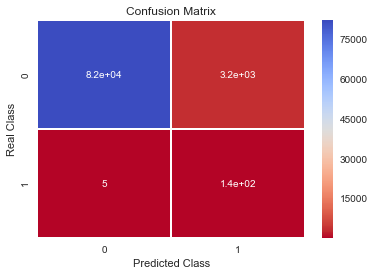

In [56]:
matrix_xgb = confusion_matrix(y_test,y_pred)
#heatmap of the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(matrix_xgb, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

# XGBoost CV model
##model = XGBClassifier()
##kfold = StratifiedKFold(n_splits=10, random_state=7)

# use area under the precision-recall curve to show classification accuracy
##scoring = 'roc_auc'
##results = cross_val_score(model,X,y, cv=kfold, scoring = scoring)
##print(("AUC: %.3f") % (results.mean()))

** Next let's look into the PCA and study the dimension reduction case.**

# PCA

In [57]:
pca = sklearnPCA(n_components=20)
Y_sklearn = pca.fit_transform(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# Ploting it
# This line tells the notebook to show plots inside of the notebook


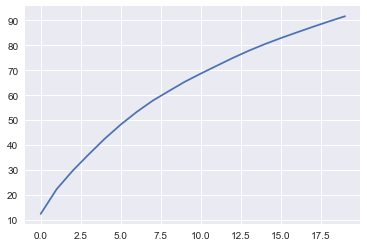

In [58]:
%matplotlib inline
plt.plot(var1)

**Based on it let's keep it 10. The looks like it has been already in proper reduced variation planes. (Like already in PCA format!)**


In [59]:
pca = sklearnPCA(n_components=10)
Y_sklearn = pca.fit_transform(X)
print(Y_sklearn)

[[ 1.32 -0.39 -2.21 ..., -0.13  0.32 -0.06]
 [-1.27 -0.08 -0.07 ..., -0.07 -0.27  0.13]
 [ 1.84  1.34 -1.64 ..., -0.36 -1.52 -0.55]
 ..., 
 [-1.76  0.93  2.7  ..., -0.67  0.31  0.57]
 [ 0.06 -0.69 -0.46 ..., -0.58  0.18  0.46]
 [ 0.69  0.27 -0.58 ...,  0.24  0.37  0.9 ]]


## CONCLUSION

[[ go back to the top ]](#Table-of-contents)

When I predict the test data from models that built in the assignment, i have got approximately 95% recall score which means we achieved a good classification. Now I realize that why data scientist used to spend most of their time into feature engineering and exploratory analysis compare to actual model building. Model that we are using is definitely important, however more than that understanding our data and feature engineering is crucial.

